# Image Classification using ResNet-50 model

#### Install required libraries

In [1]:
%pip install keras

In [2]:
%pip install tensorflow

In [3]:
%pip install pillow

#### Select a file via a dialog and return the file name

In [4]:
%gui qt

from PyQt5.QtWidgets import QFileDialog

def gui_fname(dir=None):
    if dir is None: dir ='./'
    fname = QFileDialog.getOpenFileName(None, "Select image file...", dir)
    return fname[0]

In [19]:
selected = gui_fname()

#### Display the selected image

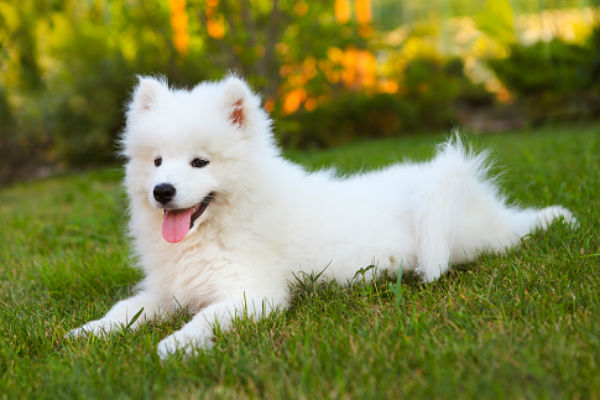

In [20]:
from IPython.display import Image
Image(filename=selected,width=576)

#### Use pre-trained ResNet-50 model via Keras

In [23]:
import numpy as np
from keras.preprocessing import image
from keras.applications import resnet50

model = resnet50.ResNet50()
img = image.load_img(selected, target_size=(224, 224))
inp = image.img_to_array(img)
inp = np.expand_dims(inp, axis=0)
inp = resnet50.preprocess_input(inp)
predictions = model.predict(inp)
predicted_classes = resnet50.decode_predictions(predictions, top=10)
print("This is an image of:")
for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

This is an image of:
 - Samoyed: 0.948499 likelihood
 - standard_poodle: 0.032070 likelihood
 - kuvasz: 0.006854 likelihood
 - Pomeranian: 0.003586 likelihood
 - toy_poodle: 0.003208 likelihood
 - miniature_poodle: 0.000853 likelihood
 - Great_Pyrenees: 0.000756 likelihood
 - West_Highland_white_terrier: 0.000520 likelihood
 - komondor: 0.000355 likelihood
 - Eskimo_dog: 0.000351 likelihood
